<a href="https://colab.research.google.com/github/KhudV/MML/blob/main/Lab4_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 4


### Дисциплина: Методы машинного обучения



##### Студент:  Худицкий Василий
##### Группа:   НКНбд-01-19

## Москва 2022
***

### Вариант №8

1. Набор данных: diamonds

2. Независимые признаки: depth, table

3. Метка класса: clarity

4. Параметры глубокой нейронной сети: кол-во скрытых слоев – 4, кол-во нейронов в скрытом слое – 64.

Решение:

1. Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимые признаки и метку класса.

In [ ]:
!pip install -q tfds-nightly

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
ds = tfds.load("diamonds", split='train')
df = tfds.as_dataframe(ds)
df.head()

,features/carat,features/clarity,features/color,features/cut,features/depth,features/table,features/x,features/y,features/z,price
0,1.26,2,4,2,60.599998,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.099998,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.700001,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.000000,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.200001,54.0,4.43,4.45,2.76,646.0


In [ ]:
df = df[['features/depth','features/table','features/clarity']]
df.columns = ['depth','table','clarity']
df.head()

,depth,table,clarity
0,60.599998,60.0,2
1,62.099998,54.0,3
2,61.700001,54.0,4
3,64.000000,58.0,3
4,62.200001,54.0,6


2. Визуализируйте точки набора данных на плоскости с координатами, соответствующими двум независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.

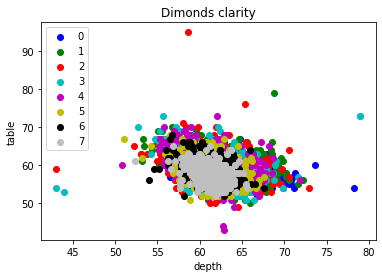

In [ ]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '0.75']
for i in range(8):
  plt.scatter(df[df['clarity']==i]['depth'], df[df['clarity']==i]['table'], c = colors[i], label = i)
plt.title('Dimonds clarity')
plt.xlabel('depth')
plt.ylabel('table')
plt.legend()

3. Если признак с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации. Объединяйте классы таким образом, чтобы положительный и отрицательный классы были сопоставимы по количеству точек.

In [ ]:
df['clarity'].value_counts().sort_index()

0      741
1     9194
2    13065
3    12258
4     8171
5     5066
6     3655
7     1790
Name: clarity, dtype: int64

In [ ]:
df['clarity'].value_counts()[:2].sum(), df['clarity'].value_counts()[2:].sum()

(25323, 28617)

In [ ]:
df['top'] = [1 if clarity >= 3 else 0 for clarity in df['clarity']]
df.drop('clarity', axis=1, inplace=True)

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,depth,table,top
0,60.599998,60.0,0
1,62.099998,54.0,1
2,61.700001,54.0,1
3,64.000000,58.0,1
4,62.200001,54.0,1


4. Разбейте набор данных из двух признаков и меток класса на обучающую и тестовую выборки. Постройте нейронную сеть с нормализующим слоем и параметрами, указанными в индивидуальном задании, для бинарной классификации и обучите ее на обучающей выборке. Оцените качество бинарной классификации при помощи матрицы ошибок для тестовой выборки.

In [ ]:
def train_test_split(X, y, test_ratio=0.2, seed=None):
    """возвращает X_train, X_test, y_train, y_test"""
    assert X.shape[0] == y.shape[0], \
        "Размер X должен быть равен размеру y"
    assert 0.0 <= test_ratio <= 1.0, \
        "Неверное значение test_ratio"

    if seed:
        np.random.seed(seed)

    shuffled_indexes = np.random.permutation(len(X))

    test_size = int(len(X) * test_ratio)
    test_indexes = shuffled_indexes[:test_size]
    train_indexes = shuffled_indexes[test_size:]

    X_train = X[train_indexes]
    y_train = y[train_indexes]

    X_test = X[test_indexes]
    y_test = y[test_indexes]

    return X_train, X_test, y_train, y_test

In [ ]:
X = np.array(df[['depth','table']])
y = np.array(df['top'])

In [ ]:
y=y[X[:,1]<70]
X=X[X[:,1]<70]

In [ ]:
y=y[X[:,1]>50]
X=X[X[:,1]>50]

In [ ]:
y=y[X[:,0]>54]
X=X[X[:,0]>54]

In [ ]:
y=y[X[:,0]<73]
X=X[X[:,0]<73]

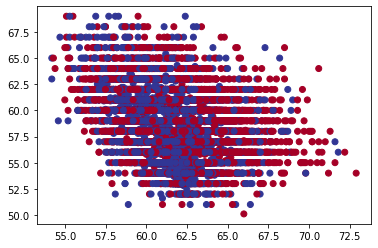

In [ ]:
plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.RdYlBu)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_ratio=0.2, seed=42
)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((43120, 2), (10780, 2), (43120,), (10780,))

In [ ]:
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(X.shape[1],))
feature_normalizer.adapt(X_train)

In [ ]:
model = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(64, activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(64, activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(64, activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(64, activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 2)                3         
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                        

In [ ]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1348/1348 [==============================] - 4s 2ms/step - loss: 0.6670 - accuracy: 0.5953
Epoch 2/100
1348/1348 [==============================] - 3s 2ms/step - loss: 0.6624 - accuracy: 0.5987
Epoch 3/100
1348/1348 [==============================] - 3s 2ms/step - loss: 0.6617 - accuracy: 0.6033
Epoch 4/100
1348/1348 [==============================] - 3s 2ms/step - loss: 0.6611 - accuracy: 0.6011
Epoch 5/100
1348/1348 [==============================] - 3s 2ms/step - loss: 0.6603 - accuracy: 0.6019
Epoch 6/100
1348/1348 [==============================] - 3s 2ms/step - loss: 0.6605 - accuracy: 0.6027
Epoch 7/100
1348/1348 [==============================] - 3s 2ms/step - loss: 0.6601 - accuracy: 0.6025
Epoch 8/100
1348/1348 [==============================] - 3s 2ms/step - loss: 0.6601 - accuracy: 0.6043
Epoch 9/100
1348/1348 [==============================] - 3s 2ms/step - loss: 0.6598 - accuracy: 0.6021
Epoch 10/100
1348/1348 [==============================] - 3s 2ms/step - l

In [ ]:
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))
def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))
def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))
def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))
def confusion_matrix(y_true, y_predict):
    return np.array([
        [TN(y_true, y_predict), FP(y_true, y_predict)],
        [FN(y_true, y_predict), TP(y_true, y_predict)]
    ])

In [ ]:
prediction = model.predict(X_test)
prediction.reshape(-1)
y_pred = np.array([1 if prob > 0.5 else 0 for prob in np.ravel(prediction)])
print(y_pred)
prediction

[0 1 1 ... 1 1 0]


array([[0.4876556 ],
       [0.6301332 ],
       [0.60005003],
       ...,
       [0.60133576],
       [0.5323872 ],
       [0.48780084]], dtype=float32)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[1527, 3177],
       [1108, 4968]])

5. Визуализируйте границы принятия решений построенной нейронной сетью на обучающей и тестовой выборках.

In [ ]:
def plot_decision_boundary(model, X, y):
    # Найдем диапазоны изменения по осям и построим сетку
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    # Набор данных для прогнозирования
    X_in = np.c_[xx.ravel(), yy.ravel()]
    # Прогноз при помощи обученной модели
    y_pred = model.predict(X_in)
    # Проверка мультиклассовости
    if len(y_pred[1]) > 1:
        # мультиклассовая классификация
        # изменяем форму прогноза для визуализации
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        # бинарная классификация
        y_pred = np.round(y_pred).reshape(xx.shape)
    # Рисуем границу решения
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

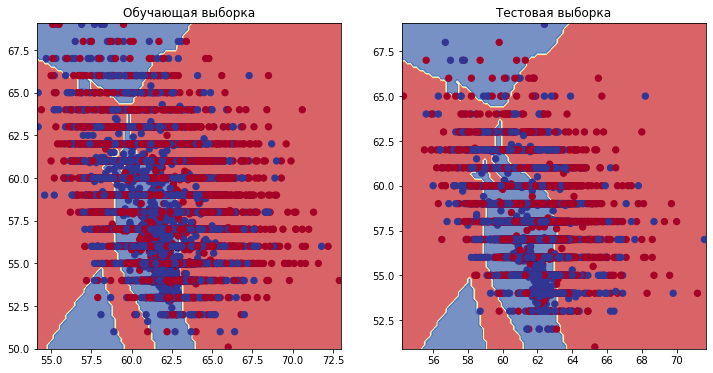

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Обучающая выборка")
plot_decision_boundary(model, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Тестовая выборка")
plot_decision_boundary(model, X=X_test, y=y_test)

6. Визуализируйте ROC-кривую для построенного классификатора и вычислите площадь под ROC-кривой методом трапеций или иным методом.

In [ ]:
def true_false_positive(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())

    return tpr, fpr

In [ ]:
def roc_from_scratch(probabilities, y_test, partitions=100):
    roc = np.array([])
    for i in range(partitions + 1):

        threshold_vector = np.greater_equal(probabilities, i / partitions).astype(int)
        tpr, fpr = true_false_positive(threshold_vector, y_test)
        roc = np.append(roc, [fpr, tpr])

    return roc.reshape(-1, 2)

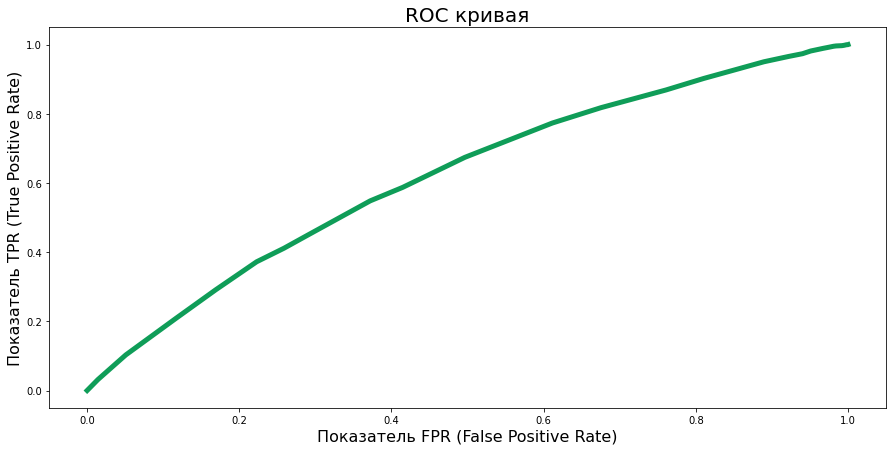

In [ ]:
plt.figure(figsize=(15,7))

ROC = roc_from_scratch(prediction.reshape(-1),y_test,partitions=50)
plt.plot(ROC[:,0],ROC[:,1],color='#0F9D58',lw=5)
plt.title('ROC кривая',fontsize=20)
plt.xlabel('Показатель FPR (False Positive Rate)',fontsize=16)
plt.ylabel('Показатель TPR (True Positive Rate)',fontsize=16);

In [ ]:
def trap(ROC): # метод трапеций
 sum = 0.5*(ROC[0,1]+ROC[len(ROC)-1, 1]) # начальное значение суммы(0.5 f(a) + 0.5 f(b))
 for i in range(1, len(ROC)): # в этом цикле считается сумма для i от 1 до M-1
  sum += ROC[i,1]
 return sum*1/len(ROC) # функция возвращает вычесленную в цикле сумму, умноженную на длину отрезков


In [ ]:
trap(ROC)

0.5741199705688727

7. Обучите на полном наборе данных нейронную сеть с одним слоем и одним выходным нейроном с функцией активации сигмоида и определите дополнительный признак, отличный от указанных в задании двух независимых признаков, принимающий непрерывные значения и являющийся важным по абсолютному значению веса в обученной нейронной сети.

In [ ]:
df = tfds.as_dataframe(ds)
df.head()

,features/carat,features/clarity,features/color,features/cut,features/depth,features/table,features/x,features/y,features/z,price
0,1.26,2,4,2,60.599998,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.099998,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.700001,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.000000,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.200001,54.0,4.43,4.45,2.76,646.0


In [ ]:
X2 = np.array(df.drop('features/clarity', axis=1))
y2 = np.array(df['features/clarity'])

In [ ]:
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(X2.shape[1],))
feature_normalizer.adapt(X2)

In [ ]:
model_aux = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_aux.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 9)                3         
 ion)                                                            
                                                                 
 dense_5 (Dense)             (None, 1)                 10        
                                                                 
Total params: 13
Trainable params: 10
Non-trainable params: 3
_________________________________________________________________


In [ ]:
model_aux.compile(loss=tf.keras.losses.binary_crossentropy)
model_aux.fit(X2, y2, epochs=100, verbose=0);

In [ ]:
model_aux.layers[1].kernel

<tf.Variable 'dense_5/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[-166.15297],
       [-167.18689],
       [-166.53448],
       [-167.27826],
       [-167.2921 ],
       [-166.12798],
       [-167.4609 ],
       [-166.93922],
       [ 160.56618]], dtype=float32)>

features/x - дополнительный признак, отличный от указанных в задании двух независимых признаков, принимающий непрерывные значения и являющийся важным по абсолютному значению веса в обученной нейронной сети.

8. Визуализируйте точки набора данных в трехмерном пространстве с координатами, соответствующими трем независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.

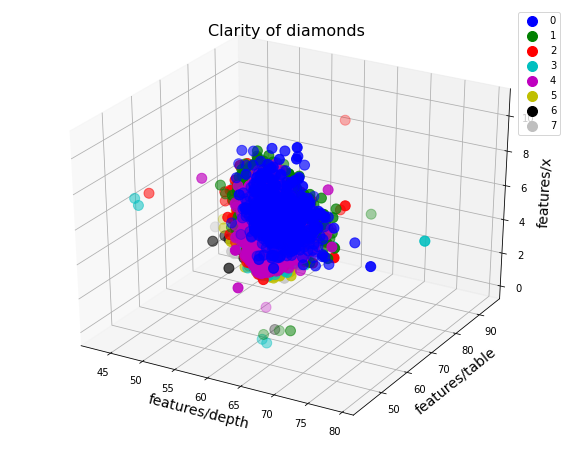

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in range(8):
  ax.scatter( df[df['features/clarity']==i]['features/depth'], df[df['features/clarity']==i]['features/table'], df[df['features/clarity']==i]['features/x'], s=100, c=colors[i], label = i )
ax.set_xlabel('features/depth', fontsize=14)
ax.set_ylabel('features/table', fontsize=14)
ax.set_zlabel('features/x', fontsize=14)
ax.set_title('Clarity of diamonds', fontsize=16)
ax.legend()

9. Разбейте полный набор данных на обучающую и тестовую выборки. Постройте нейронную сеть с нормализующим слоем и параметрами, указанными в индивидуальном задании, для многоклассовой классификации и обучите ее на обучающей выборке.

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2,
    test_ratio=0.2, seed=45
)

In [ ]:
y2_train.shape, y2_test.shape

((43152,), (10788,))

In [ ]:
def to_one_hot(labels, dimension=3):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [ ]:
y2_train = to_one_hot(y2_train, 8)
y2_test = to_one_hot(y2_test, 8)
y2_train.shape, y2_test.shape

((43152, 8), (10788, 8))

In [ ]:
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(X2.shape[1],))
feature_normalizer.adapt(X2_train)

In [ ]:
model_2 = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(64, activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(64, activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(64, activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(64, activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(8, activation="softmax")
])

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 9)                3         
 ion)                                                            
                                                                 
 dense_6 (Dense)             (None, 64)                640       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                      

In [ ]:
model_2.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
history = model_2.fit(X2_train,
                    y2_train,
                    epochs=50,
                    # уровень выводимой информации
                    verbose=1,
                    # проверка (валидация) на 20% обучающих данных
                    validation_split = 0.2)

Epoch 1/50
1079/1079 [==============================] - 3s 2ms/step - loss: 1.7909 - accuracy: 0.2663 - val_loss: 1.7639 - val_accuracy: 0.2885
Epoch 2/50
1079/1079 [==============================] - 2s 2ms/step - loss: 1.7577 - accuracy: 0.2871 - val_loss: 1.7482 - val_accuracy: 0.2961
Epoch 3/50
1079/1079 [==============================] - 2s 2ms/step - loss: 1.7475 - accuracy: 0.2935 - val_loss: 1.7527 - val_accuracy: 0.2893
Epoch 4/50
1079/1079 [==============================] - 2s 2ms/step - loss: 1.7445 - accuracy: 0.2953 - val_loss: 1.7377 - val_accuracy: 0.2899
Epoch 5/50
1079/1079 [==============================] - 2s 2ms/step - loss: 1.7421 - accuracy: 0.2973 - val_loss: 1.7595 - val_accuracy: 0.2798
Epoch 6/50
1079/1079 [==============================] - 3s 2ms/step - loss: 1.7394 - accuracy: 0.2983 - val_loss: 1.7394 - val_accuracy: 0.2937
Epoch 7/50
1079/1079 [==============================] - 2s 2ms/step - loss: 1.7377 - accuracy: 0.2992 - val_loss: 1.7366 - val_accuracy:

10. Постройте кривые обучения в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.

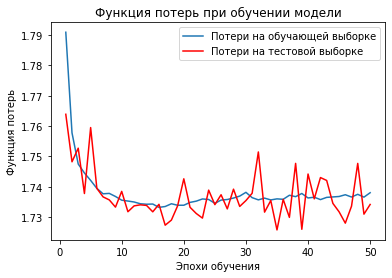

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, label="Потери на обучающей выборке")
plt.plot(epochs, val_loss, c='r', label="Потери на тестовой выборке")
plt.title("Функция потерь при обучении модели")
plt.xlabel("Эпохи обучения")
plt.ylabel("Функция потерь")
plt.legend();